In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
ecs_cpu_p95 = np.load('../../datasets/ecs/ecs_cpu_p95.npy')
ecs_cpu_mean = np.load('../../datasets/ecs/ecs_cpu_mean.npy')
ecs_cpu_std = np.load('../../datasets/ecs/ecs_cpu_std.npy')

In [3]:
train_df = pd.read_csv('../../datasets/training_2nd_dataset.csv')
train_df['identifier'] = train_df['domain_name'] +'-'+ train_df['city'] +'-'+ train_df['isp'] +'-'+ train_df['node_name']

used_idx = train_df['identifier'].value_counts().index.tolist()[:-11547]
train_filtered = train_df.loc[train_df['identifier'].isin(used_idx)].copy()

In [4]:
vldb_cpu_p95 = []
vldb_cpu_mean = []
vldb_cpu_std = []

node_lst = train_filtered['node_name'].unique().tolist()
for num, i in enumerate(node_lst):
    tmp = train_filtered.loc[train_filtered['node_name'] == i].copy()
    tmp_stat = tmp['cpu_util'].describe([.05,.25,.5,.75,.95]).values.tolist()
    vldb_cpu_mean.append(tmp_stat[1])
    vldb_cpu_std.append(tmp_stat[2])
    vldb_cpu_p95.append(tmp_stat[-2])

In [5]:
ecs_cv = [ecs_cpu_std[i] / ecs_cpu_mean[i] for i in range(len(ecs_cpu_mean))]
vldb_cv = [vldb_cpu_std[i] / vldb_cpu_mean[i] for i in range(len(vldb_cpu_mean))]

In [6]:
ecs_mem_p95 = np.load('../../datasets/ecs/ecs_mem_p95.npy')
ecs_mem_mean = np.load('../../datasets/ecs/ecs_mem_mean.npy')
ecs_mem_std = np.load('../../datasets/ecs/ecs_mem_std.npy')

In [7]:
vldb_mem_p95 = []
vldb_mem_mean = []
vldb_mem_std = []

node_lst = train_filtered['node_name'].unique().tolist()
for num, i in enumerate(node_lst):
    tmp = train_filtered.loc[train_filtered['node_name'] == i].copy()
    tmp_stat = tmp['mem_util'].describe([.05,.25,.5,.75,.95]).values.tolist()
    vldb_mem_mean.append(tmp_stat[1])
    vldb_mem_std.append(tmp_stat[2])
    vldb_mem_p95.append(tmp_stat[-2])

In [8]:
ecs_mem_cv = [ecs_mem_std[i] / ecs_mem_mean[i] for i in range(len(ecs_mem_mean))]
vldb_mem_cv = [vldb_mem_std[i] / vldb_mem_mean[i] for i in range(len(vldb_mem_mean))]

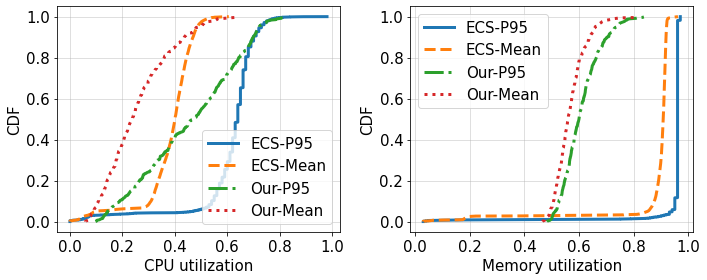

In [9]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig, axs = plt.subplots(1, 2,figsize = (10, 4))

ax0=axs[0]
ax0.plot(sorted(ecs_cpu_p95/100),np.arange(len(ecs_cpu_p95)) / len(ecs_cpu_p95), 
         color=colors[0], ls='-',linewidth=3, label="ECS-P95")
ax0.plot(sorted(ecs_cpu_mean/100),np.arange(len(ecs_cpu_mean)) / len(ecs_cpu_mean), 
         color=colors[1], ls='--',linewidth=3, label="ECS-Mean")
ax0.plot(sorted(vldb_cpu_p95),np.arange(len(vldb_cpu_p95)) / len(vldb_cpu_p95), 
         color=colors[2], ls='-.',linewidth=3, label="Our-P95")
ax0.plot(sorted(vldb_cpu_mean),np.arange(len(vldb_cpu_mean)) / len(vldb_cpu_mean), 
         color=colors[3], ls=':',linewidth=3, label="Our-Mean")
ax0.grid(alpha=0.5)
ax0.tick_params(axis='both', which='major', labelsize=15)
# ax0.set_xscale('log')
ax0.set_xlabel('CPU utilization' , fontsize=15)
ax0.set_ylabel('CDF', fontsize=15)
ax0.legend(fontsize=15)


ax1=axs[1]
ax1.plot(sorted(ecs_mem_p95/100),np.arange(len(ecs_mem_p95)) / len(ecs_mem_p95), 
         color=colors[0], ls='-',linewidth=3, label="ECS-P95")
ax1.plot(sorted(ecs_mem_mean/100),np.arange(len(ecs_mem_mean)) / len(ecs_mem_mean), 
         color=colors[1], ls='--',linewidth=3, label="ECS-Mean")
ax1.plot(sorted(vldb_mem_p95),np.arange(len(vldb_mem_p95)) / len(vldb_mem_p95), 
         color=colors[2], ls='-.',linewidth=3, label="Our-P95")
ax1.plot(sorted(vldb_mem_mean),np.arange(len(vldb_mem_mean)) / len(vldb_mem_mean), 
         color=colors[3], ls=':',linewidth=3, label="Our-Mean")
ax1.grid(alpha=0.5)
ax1.tick_params(axis='both', which='major', labelsize=15)
# ax0.set_xscale('log')
ax1.set_xlabel('Memory utilization' , fontsize=15)
ax1.set_ylabel('CDF', fontsize=15)
ax1.legend(fontsize=15)

fig.tight_layout()
# fig.savefig('./qos_ecs_cpu_mem.pdf')